In [ ]:
import numpy as np
import ot
import pandas as pd
from collections import defaultdict
import seaborn as sns
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True, connected=True)
%matplotlib widget
import matplotlib.pyplot as plt
import TiOT_lib


In [2]:
file_path = 'DailyDelhiClimateTrain.csv'
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
# Ensure 'date' is a datetime object
df['date'] = pd.to_datetime(df['date'])

# Set the date as the index if needed (optional)
df.set_index('date', inplace=True)

# Lag-experiment part

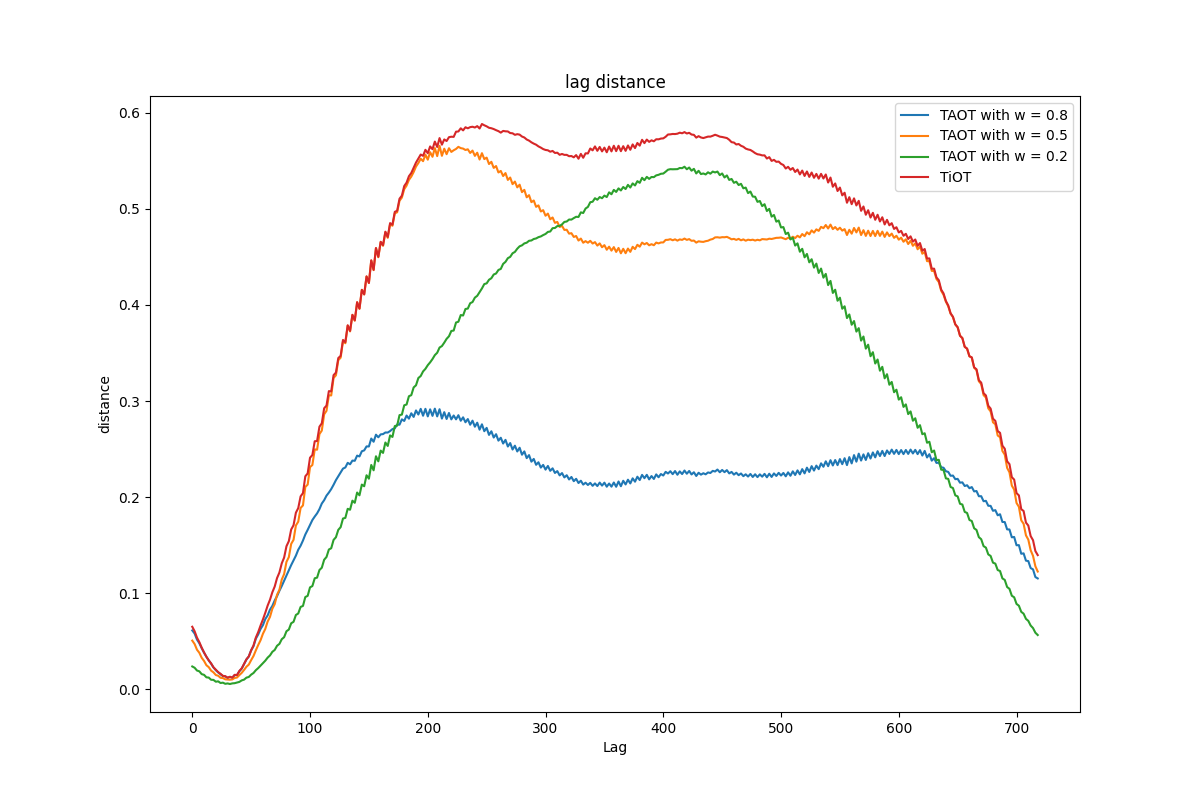

In [ ]:
TAOT_dist1 = []
TAOT_dist2 = []
TAOT_dist3 = []
TiOT_dist = []
for lag in range(0,360,1):
    TAOT_dist1.append(TiOT_lib.TAOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step], w = 0.8 , costmatrix=TiOT_lib.costmatrix4)[0])
    TAOT_dist2.append(TiOT_lib.TAOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step], w = 0.5 , costmatrix=TiOT_lib.costmatrix4)[0])
    TAOT_dist3.append(TiOT_lib.TAOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step], w = 0.2 , costmatrix=TiOT_lib.costmatrix4)[0])
    TiOT_dist.append(TiOT_lib.TiOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step])[0])

plt.figure(figsize=(12,8))
plt.plot(range(0,720,2),TAOT_dist1, label = "TAOT with w = 0.8")
np.savetxt("TAOT_dist1.txt", np.array(TAOT_dist1))

plt.plot(range(0,720,2), TAOT_dist2, label = "TAOT with w = 0.5")
np.savetxt("TAOT_dist2.txt", np.array(TAOT_dist2))

plt.plot(range(0,720,2), TAOT_dist3, label = "TAOT with w = 0.2")
np.savetxt("TAOT_dist3.txt", np.array(TAOT_dist3))

plt.plot(range(0,720,2), TiOT_dist, label = "TiOT")
np.savetxt("TiOT_dist.txt", np.array(TiOT_dist))


plt.title(f'lag distance')
plt.xlabel('Lag')
plt.ylabel('distance')
plt.legend() 
plt.savefig("Lag graph.png")
# Show the heatmap
plt.show()

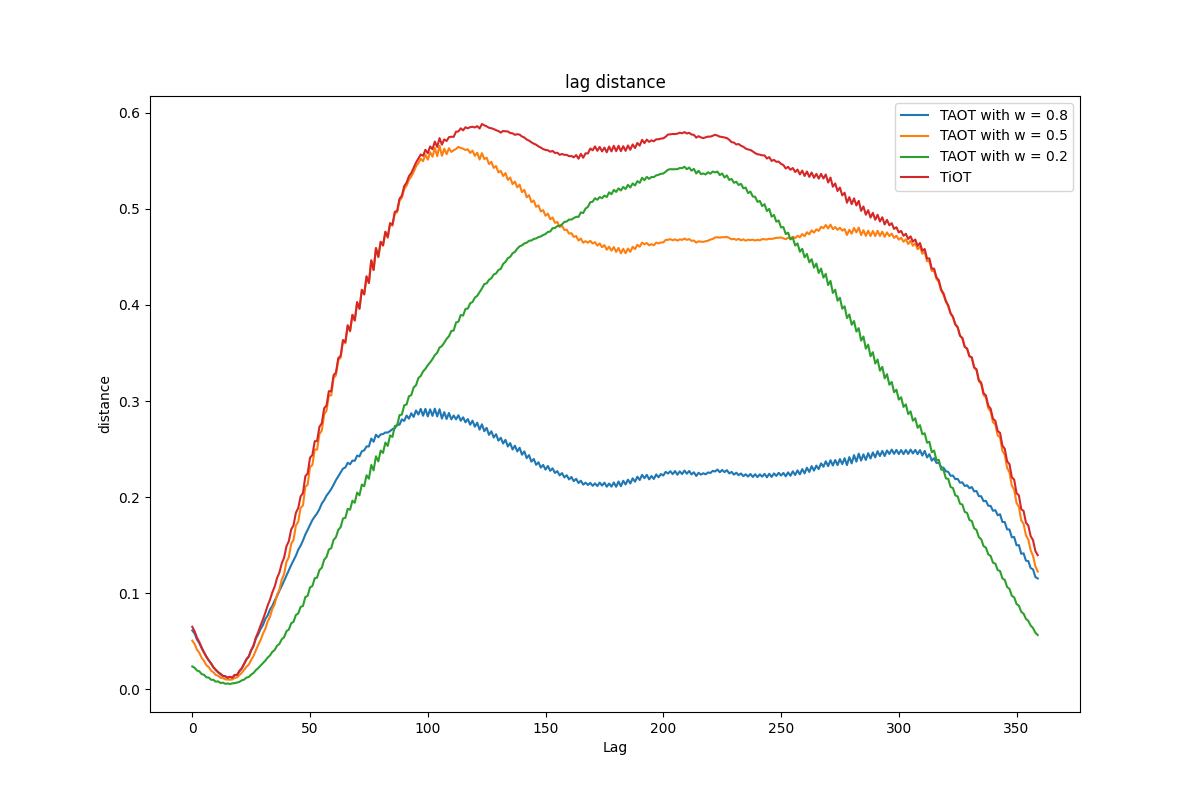

In [ ]:
TAOT_dist1 = []
TAOT_dist2 = []
TAOT_dist3 = []
TiOT_dist = []

TAOT_dist1 = np.loadtxt('TAOT_dist1.txt')
TAOT_dist2 = np.loadtxt('TAOT_dist2.txt')
TAOT_dist3 = np.loadtxt('TAOT_dist3.txt')
TiOT_dist = np.loadtxt("TiOT_dist.txt")
plt.figure(figsize=(12,8))
plt.plot(range(0,360,1),TAOT_dist1, label = "TAOT with w = 0.8")

plt.plot(range(0,360,1), TAOT_dist2, label = "TAOT with w = 0.5")

plt.plot(range(0,360,1), TAOT_dist3, label = "TAOT with w = 0.2")

plt.plot(range(0,360,1), TiOT_dist, label = "TiOT")


plt.title(f'lag distance')
plt.xlabel('Lag')
plt.ylabel('distance')
plt.legend() 
plt.savefig("Lag graph.png")
# Show the heatmap
plt.show()

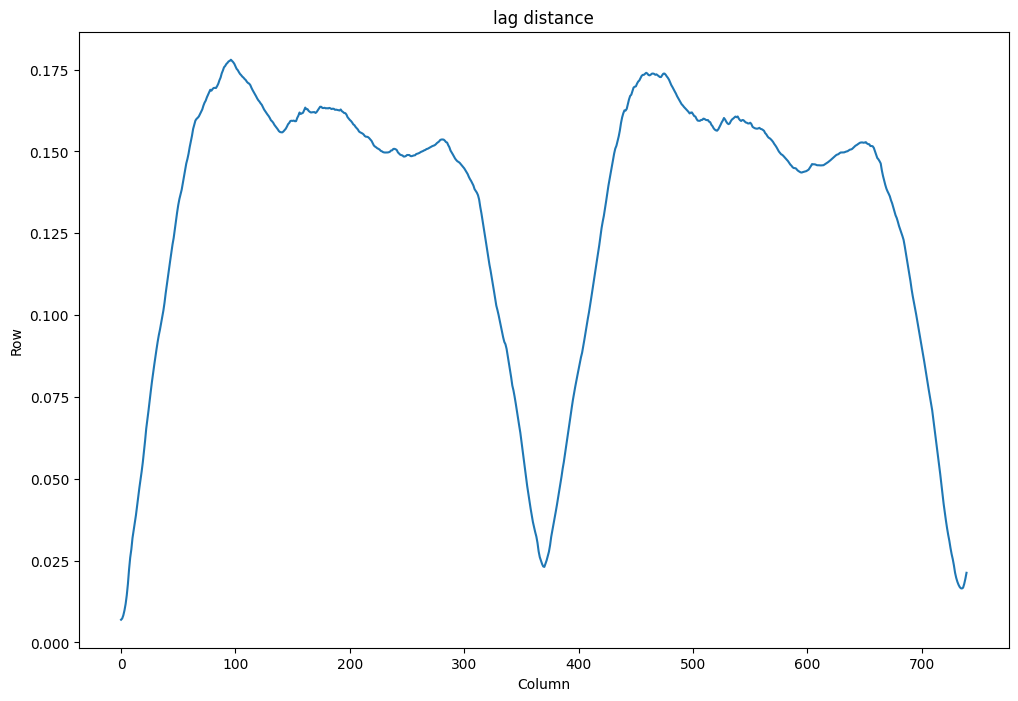

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 10)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

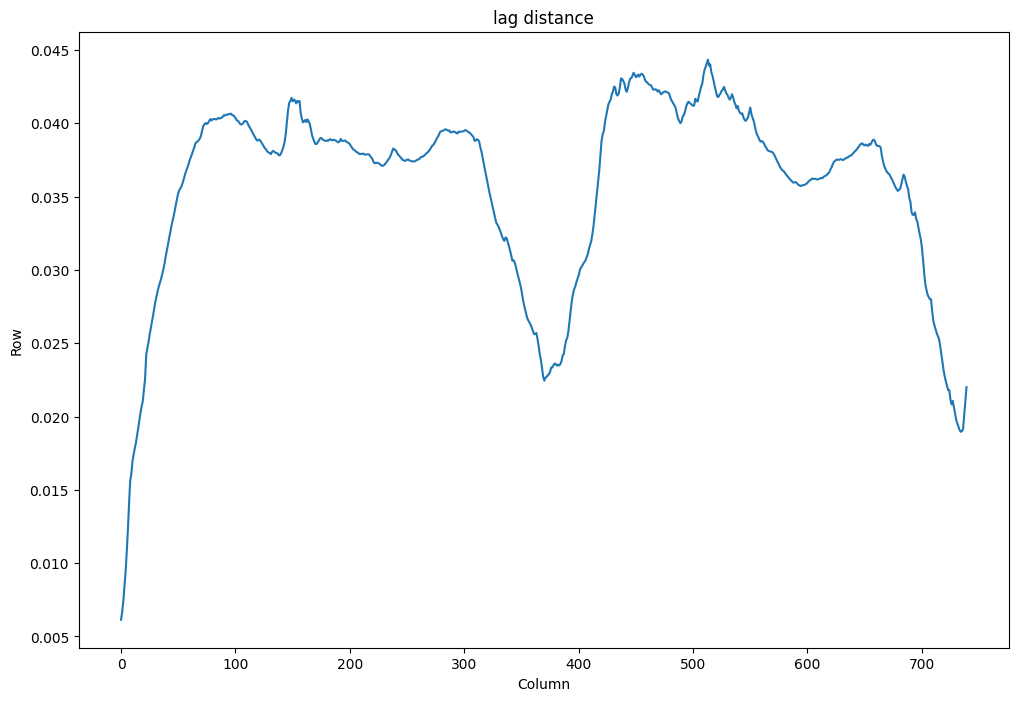

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 1)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

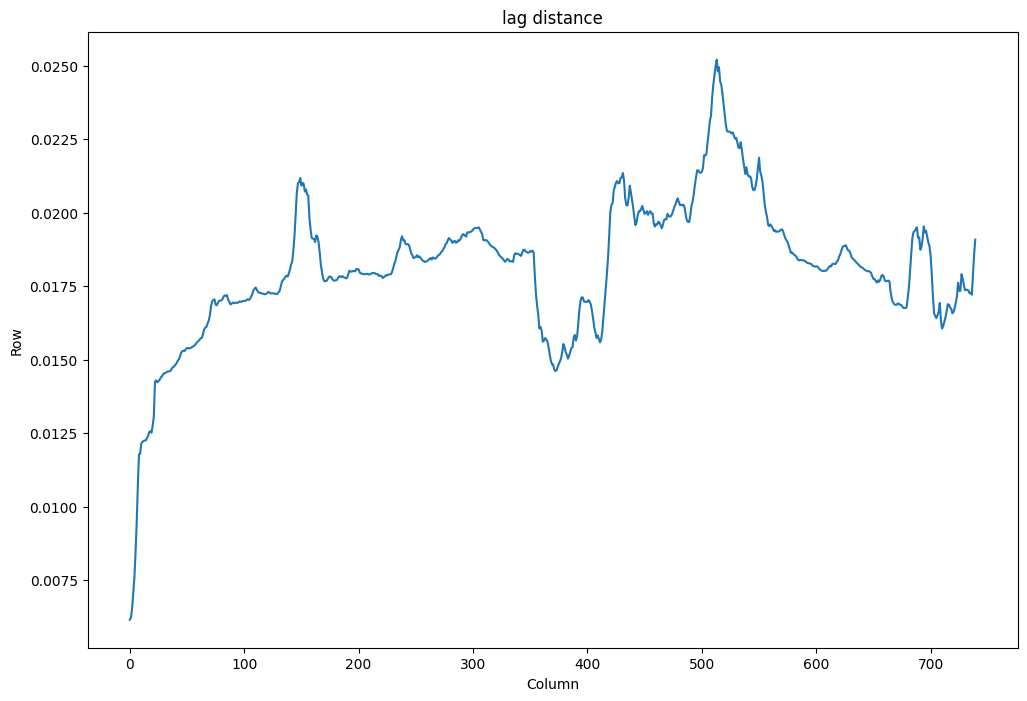

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 0.1)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

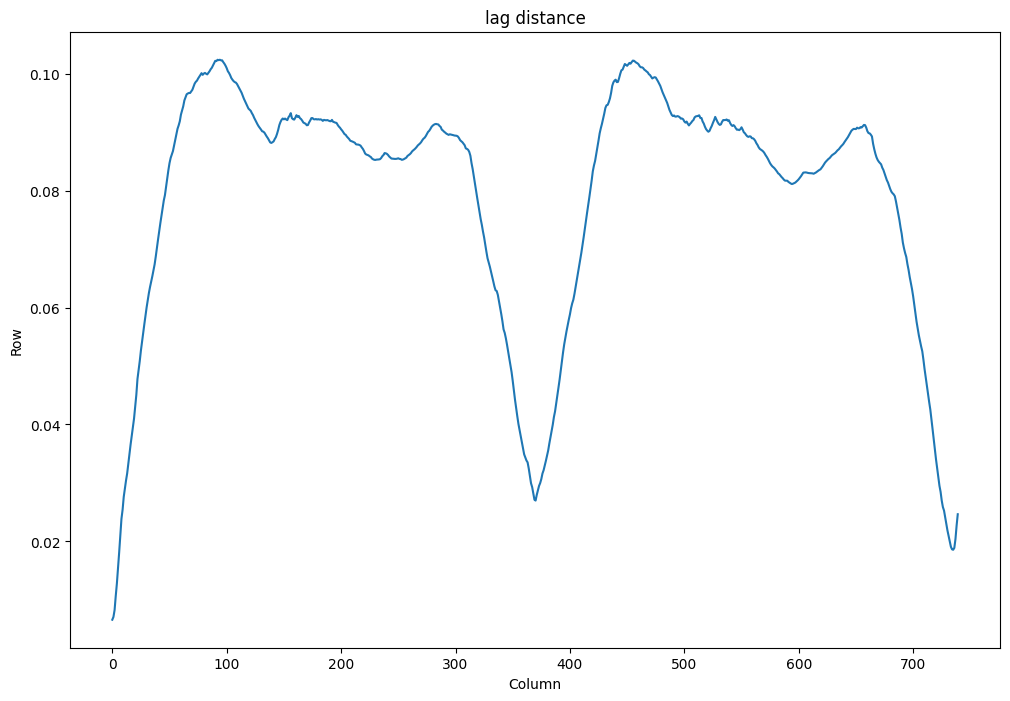

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 4)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

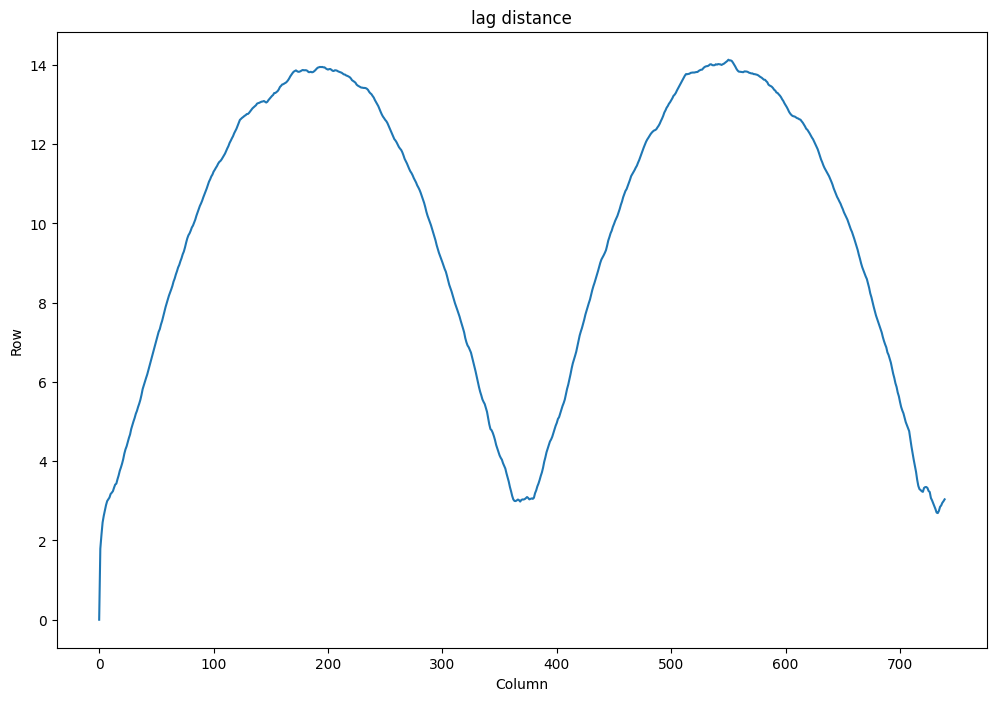

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.euclid_dist(df.iloc[0:366]['meantemp'].to_numpy(), df.iloc[lag:366+lag]['meantemp'].to_numpy() )[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

plt.show()

In [ ]:
print(f" distance = {TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[1100:1100+366]['meantemp'].to_list(), w = 100)[0]}")
print(f" distance = {TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[150:150+366]['meantemp'].to_list(), w = 200)[0]}")


 distance = 0.04552143594116671
 distance = 0.3948814034842595


In [ ]:
dis, matrix = TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[366:366+366]['meantemp'].to_list(), w = 300)
print("dis = ", dis)
matrix = 365*matrix
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        if matrix[i,j] > 10**-3:
            print(f" ({i},{j}) = {matrix[i,j]}")

dis =  0.013607938525474329
 (0,0) = 0.04422179101420597
 (0,1) = 0.13705611310678914
 (0,2) = 0.11393272342112491
 (0,3) = 0.1144396844328529
 (0,4) = 0.058531345539143756
 (0,5) = 0.0912307143800206
 (0,6) = 0.074151321346378
 (0,7) = 0.06296904760602084
 (0,8) = 0.06870709558774397
 (0,9) = 0.06154836368246603
 (0,10) = 0.038478623145293565
 (0,11) = 0.006298911191527608
 (0,13) = 0.03719533673739547
 (0,14) = 0.02997885851592266
 (0,15) = 0.027735910169294498
 (0,16) = 0.018244120996785494
 (0,19) = 0.002492923714721047
 (0,23) = 0.006739256314277153
 (1,0) = 0.1563014094460009
 (1,1) = 0.08466046400098441
 (1,2) = 0.04591842083083347
 (1,3) = 0.08383752613998058
 (1,4) = 0.13146122743827895
 (1,5) = 0.08986037296920305
 (1,6) = 0.10116187635880525
 (1,7) = 0.02830978694040133
 (1,8) = 0.05347434758130388
 (1,9) = 0.06497559943771287
 (1,10) = 0.017084778419334593
 (1,13) = 0.04771057918161084
 (1,14) = 0.027854946265593376
 (1,15) = 0.03644865075795791
 (1,16) = 0.0135129907860033

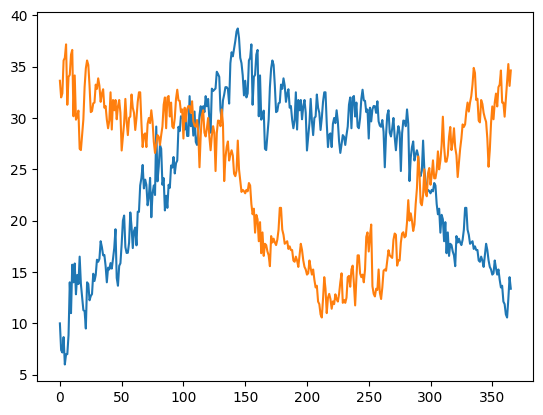

In [ ]:
plt.plot(df.iloc[0:366]['meantemp'].to_list())
plt.plot(df.iloc[150:150+366]['meantemp'].to_list())
plt.show()

In [ ]:
dis, matrix = TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[150:150+366]['meantemp'].to_list(), w = 300)
print("dis = ", dis)
matrix = 365* matrix
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        if matrix[i,j] > 10**-3:
            print(f" ({i},{j}) = {matrix[i,j]}")

dis =  0.35375584767760315
 (0,0) = 0.010834521364836204
 (0,1) = 0.16321408466529194
 (0,2) = 0.08124182468936846
 (0,6) = 0.17994291513934974
 (0,7) = 0.0013969055845132385
 (0,11) = 0.1387235355297003
 (0,13) = 0.10448536278928663
 (0,14) = 0.10766681379802198
 (0,15) = 0.08375018729501253
 (0,16) = 0.0036573741004046097
 (0,17) = 0.002911594788562921
 (0,18) = 0.021328315241915637
 (0,19) = 0.06241963566653544
 (0,25) = 0.014442927395755777
 (0,26) = 0.009968783471041947
 (0,27) = 0.002050958455820575
 (0,28) = 0.0012926652536211617
 (0,38) = 0.0011105207418263294
 (0,39) = 0.002248278763230021
 (0,42) = 0.001126991457978598
 (1,1) = 0.0122716512988621
 (1,2) = 0.0037995751180276128
 (1,6) = 0.03440258391000294
 (1,11) = 0.11043243941441054
 (1,13) = 0.12803358560750588
 (1,14) = 0.09162957525363424
 (1,15) = 0.03597811233429961
 (1,16) = 0.14692686996013543
 (1,17) = 0.1379354440558729
 (1,18) = 0.15959493798980764
 (1,19) = 0.08013235974171297
 (1,25) = 0.008375206948323841
 (1,2